## Trend Analysis

This notebook looks into trends for the different phones and over time.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
#read in data from xlsx file
df = pd.read_excel("combined_phone_data.xlsx")
df

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
0,0,alcatel axel,32gb,black,1,2022-01-24,2022,1,alcatel,axel,NaN,4,1,2022
1,1,alcatel axel,32gb,black,3,2022-11-14,2022,11,alcatel,axel,NaN,2,11,2022
2,2,alcatel axel,32gb,black,1,2022-11-21,2022,11,alcatel,axel,NaN,3,11,2022
3,3,alcatel axel,32gb,black,3,2022-11-28,2022,11,alcatel,axel,NaN,4,11,2022
4,4,alcatel axel,32gb,black,1,2022-12-12,2022,12,alcatel,axel,NaN,2,12,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26656,26656,samsung galaxy z fold3,256gb,silver,17,2023-01-30,2023,1,samsung,galaxy,z,5,1,2023
26657,26657,samsung galaxy z fold3,256gb,silver,26,2023-02-06,2023,2,samsung,galaxy,z,1,2,2023
26658,26658,samsung galaxy z fold3,256gb,silver,4,2023-02-13,2023,2,samsung,galaxy,z,2,2,2023
26659,26659,samsung galaxy z fold3,512gb,black,61,2023-02-06,2023,2,samsung,galaxy,z,1,2,2023


### Finding most popular phone models, colors, storage sizes, and combinations of these factors.

Let's see the counts of all the phone models.

In [ ]:

# plot the counts of the 'fruit' column
df['phone model'].value_counts().plot(kind='bar')

# set the plot title and axis labels
plt.title('Phone Models')
plt.xlabel('models')
plt.ylabel('Count')

# display the plot
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'apple iphone 12'),
  Text(1, 0, 'apple iphone 11'),
  Text(2, 0, 'apple iphone 6s'),
  Text(3, 0, 'apple iphone 13'),
  Text(4, 0, 'apple iphone 8'),
  Text(5, 0, 'apple iphone 7'),
  Text(6, 0, 'apple iphone xr'),
  Text(7, 0, 'apple iphone xs'),
  Text(8, 0, 'apple iphone 6'),
  Text(9, 0, 'samsung galaxy s10'),
  Text(10, 0, 'samsung galaxy s8'),
  Text(11, 0, 'samsung galaxy s20'),
  Text(12, 0, 'samsung galaxy s21'),
  Text(13, 0, 'samsung galaxy note 10'),
  Text(14, 0, 'samsung galaxy s9'),
  Text(15, 0, 'samsung galaxy s7'),
  Text(16, 0, 'apple iphone se'),
  Text(17, 0, 'samsung galaxy note 20'),
  Text(18, 0, 'apple iphone se 2020'),
  Text(19, 0, 'samsung galaxy s6'),
  Text(20, 0, 'apple iphone x'),
  Text(21, 0, 'samsung galaxy note 9'),
  Text(22, 0, 'samsung galaxy s20 fe'),
  Text(23, 0, 

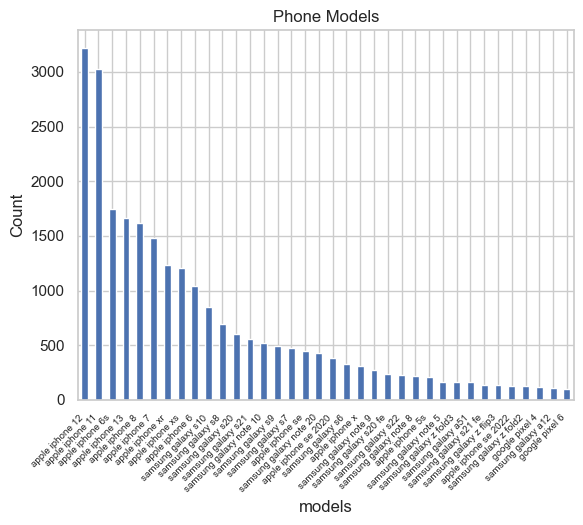

In [57]:
#plot the counts of the 'fruit' column with counts > 500
df['phone model'].value_counts()[df['phone model'].value_counts() > 100].plot(kind='bar')
#set the plot title and axis labels
plt.title('Phone Models')
plt.xlabel('models')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right',size=7)

let's fix the issue with having gb and see which phone storage size is most popular

In [ ]:
df['phone size'] = np.array(df['phone size'].str.replace('gb', '')).astype(int)

In [ ]:
size_counts = df['phone size'].value_counts()
size_counts

In [ ]:
# plot the counts of the 'fruit' column
size_counts.sort_index().plot(kind='bar')

# set the plot title and axis labels
plt.title('Phone Sizes')
plt.xlabel('Sizes')
plt.ylabel('Count')

# display the plot
plt.show()

Let's see which color is the most popular.

In [40]:

color_counts = df['phone color'].value_counts()
color_counts
     

black        5192
gray         4243
silver       3666
gold         3455
blue         2224
white        1638
green        1552
red          1430
purple        766
yellow        427
platinum      316
pink          303
coral         220
bronze        203
graphite      196
midnight      189
glow          149
lavender      141
starlight     120
violet        104
titanium       79
cream          29
burgundy       15
orange          4
Name: phone color, dtype: int64

In [ ]:
color_counts.plot(kind='bar')

# set the plot title and axis labels
plt.title('Phone Colors')
plt.xlabel('Colors')
plt.ylabel('Count')

# display the plot
plt.show()

Let's see which combination of phone model, color, and storage size is the most popular.

<AxesSubplot: xlabel='phone model,phone size'>

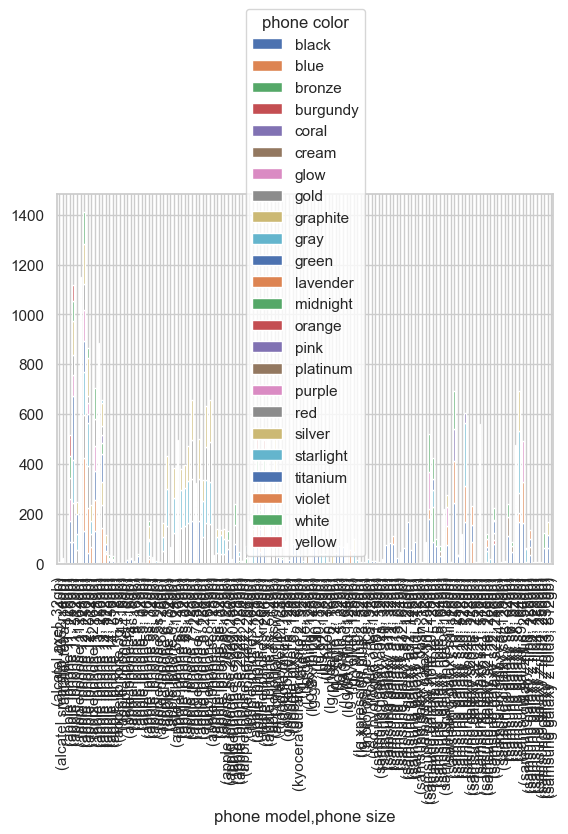

In [44]:
grp1 = df.groupby(['phone model','phone size','phone color'])
#plot the counts of the 'fruit' column



In [42]:
#seeing the combo with the most claims
maxGrp = grp1['claim'].sum()
print(maxGrp.idxmax(), ": ", maxGrp.max())

('apple iphone 12', '128gb', 'blue') :  45452


In [43]:
#seeing combo with the least claims

maxGrp = grp1['claim'].sum()
print(maxGrp.idxmin(), ": ", maxGrp.min())

('apple iphone 14', '128gb', 'silver') :  1


It appears that the most commonly claimed phones is the 'iphone 11, 64, black' with 28645 claims, while the least claimed phone is the 'iphone 14, 256, red' with 1 claim.

### Trend Analysis 

Let's see if there are different trends among phones.

Let's see how the Samsung phones compare to eachother.

C:\Users\Rachel Montgomery\AppData\Local\Temp\ipykernel_16628\4191915866.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, item in test2:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

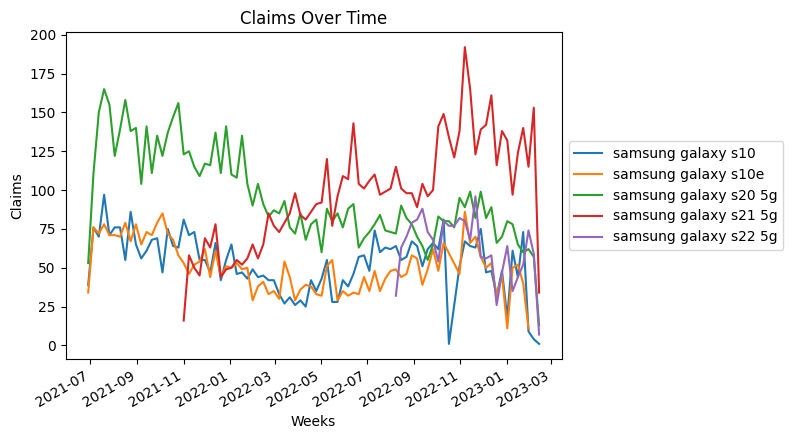

In [6]:
test2 = df.groupby(['phone model'])
# Create a time series plot of the claims column
for key, item in test2:
    temp = test2.get_group(key)
    if not temp['phone model'].str.contains('samsung galaxy s[0-9]{2}.{0,3}$').any():
        continue
    temp2 = temp.groupby('weeks_monday').agg({'claim':'sum', 'phone model':'first'})
    temp2["claim"].plot(label=temp2['phone model'][0])

# Add labels and a title to the plot
plt.xlabel("Weeks")
plt.ylabel("Claims")
plt.title("Claims Over Time")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Display the plot
plt.show()

Let's see how the ihpones compare to eachother.

C:\Users\Rachel Montgomery\AppData\Local\Temp\ipykernel_16628\2135060498.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, item in test2:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

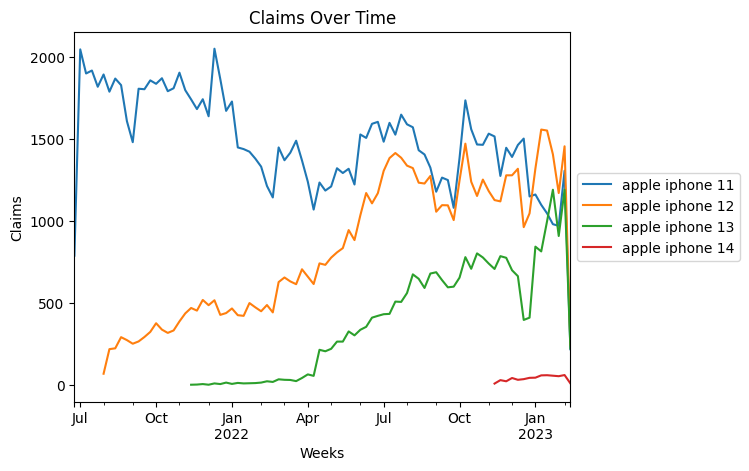

In [7]:
test2 = df.groupby(['phone model'])
# Create a time series plot of the claims column
for key, item in test2:
    temp = test2.get_group(key)
    if not temp['phone model'].str.contains('iphone 1[1-9]{1}$').any():
        continue
    temp2 = temp.groupby('weeks_monday').agg({'claim':'sum', 'phone model':'first'})
    temp2["claim"].plot(label=temp2['phone model'][0])

# Add labels and a title to the plot
plt.xlabel("Weeks")
plt.ylabel("Claims")
plt.title("Claims Over Time")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Display the plot
plt.show()

### Ok let's do something else now


explore line charts 
- for whole time line, compare all models
- for whole time line, compare all iphone models
-compare iphone versus samsung
-compare just top 5 iphone models 


for models -> have to have at least 100 claims (to make dataset smaller)

for weeks -> create new labels that identify if the week is the 1st,2nd, 3rd, or 4th week of month and
see how that influences things (mayybe 1st/last week is the most sales?)
also examine the timeline in reference to the launch date of the current phone and the newer model
(i.e. if the 10 came out in nov, and the 11 comes out in feb, how does that affect things)


C:\Users\Rachel Montgomery\AppData\Local\Temp\ipykernel_16628\418826438.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, item in test2:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

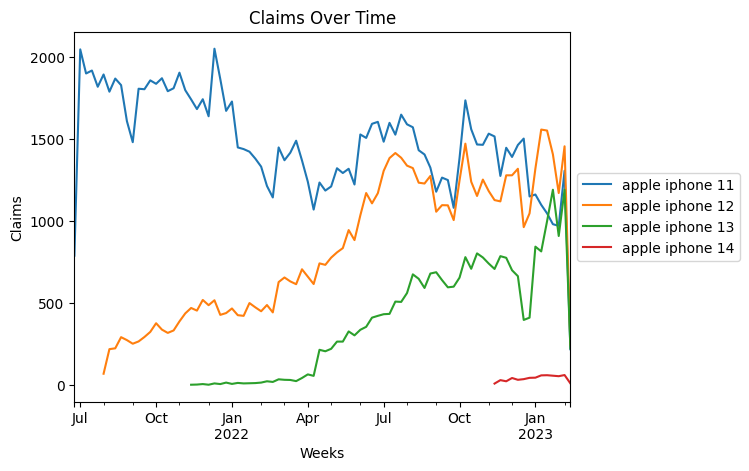

In [8]:
#create a time series plot for iphone 11
test2 = df.groupby(['phone model'])
# Create a time series plot of the claims column
for key, item in test2:
    temp = test2.get_group(key)
    if not temp['phone model'].str.contains('iphone 1[1-9]{1}$').any():
        continue
    temp2 = temp.groupby('weeks_monday').agg({'claim':'sum', 'phone model':'first'})
    temp2["claim"].plot(label=temp2['phone model'][0])

# Add labels and a title to the plot
plt.xlabel("Weeks")
plt.ylabel("Claims")
plt.title("Claims Over Time")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Display the plot
plt.show()


### Trying a different approach

Sampling from Alex's seasonal decomposition code to plot time series.

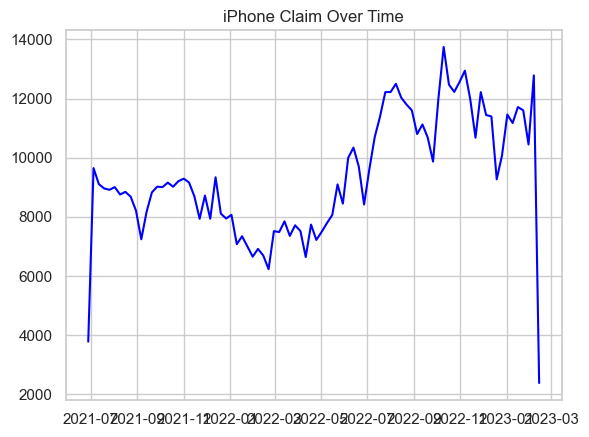

In [34]:
iphone_data = df[df['brand'] == 'apple'].groupby(['weeks_monday']).agg({"claim": "sum"}).reset_index()

time = np.array(iphone_data['weeks_monday'])
claims = np.array(iphone_data['claim'])

plt.plot(time, claims, color='blue')
plt.title('iPhone Claim Over Time')
plt.show()

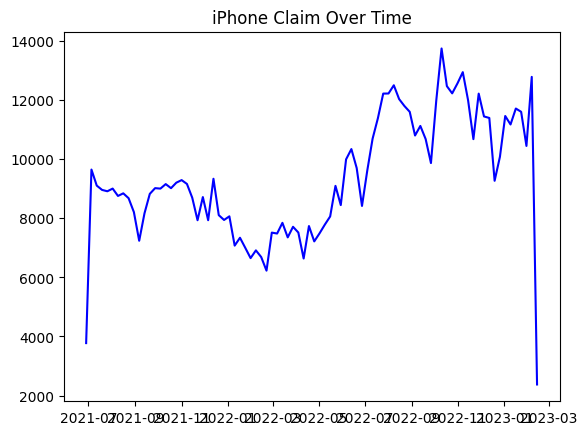

In [19]:
#time series plot for iphone 11
iphone11 = df[df['generation'] == '11'].groupby(['weeks_monday']).agg({"claim": "sum"}).reset_index()

time = np.array(iphone_data['weeks_monday'])
claims = np.array(iphone_data['claim'])

plt.plot(time, claims, color='blue')
plt.title('iPhone Claim Over Time')
plt.show()

C:\Users\Rachel Montgomery\AppData\Local\Temp\ipykernel_16628\767839622.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'iPhone 11 Claim Over Time')

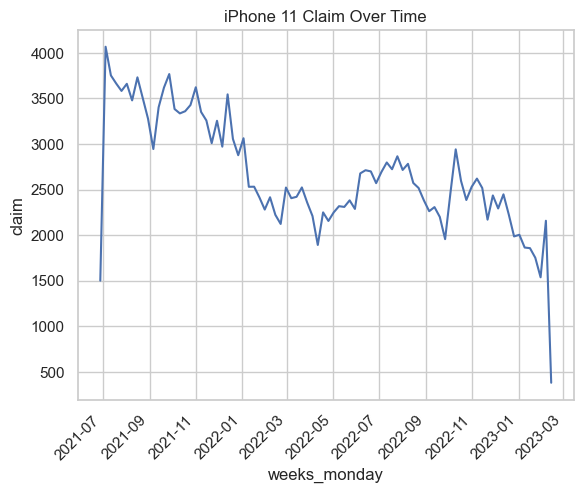

In [26]:
#plot the iphone 11 claim over time using seaborn
import seaborn as sns
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
chart = sns.lineplot(x='weeks_monday', y='claim', data=iphone11)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('iPhone 11 Claim Over Time')

now let's see if we can create a facet plot of each iphone 

In [35]:
#create a df of iphone data, keeping the generation variable
iphone = df[df['brand'] == 'apple'].groupby(['weeks_monday', 'generation']).agg({"claim": "sum"}).reset_index()


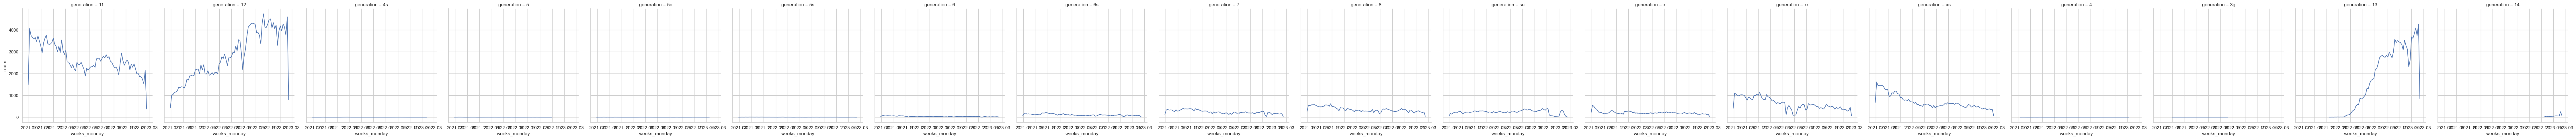

In [39]:

import seaborn as sns
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.relplot(data=iphone, x='weeks_monday', y='claim',col="generation", kind="line")
